# Data Exploration

In [187]:
import pandas_datareader.data as web
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from pandas.plotting import scatter_matrix

In [25]:
start=datetime.datetime(2016,1,1)
end=datetime.datetime(2021,1,1)

In [29]:
amazon=web.DataReader("AMZN","yahoo",start,end)
google=web.DataReader("GOOG","yahoo",start,end)
facebook=web.DataReader("fb","yahoo",start,end)

In [34]:
amazon.head()
google.head()
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [36]:
amazon.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [37]:
google.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [38]:
facebook.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [41]:
facebook.info()
amazon.info()
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pa

In [113]:
facebook.to_csv("fb_stocks.csv")
amazon.to_csv("amazon_stocks.csv")
google.to_csv("google_stocks.csv")

# Lowest close of all the stocks ?

In [69]:
facebook[facebook['Close']==facebook['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-21,95.989998,92.620003,94.910004,94.160004,30518900,94.160004


In [64]:
amazon[amazon['Close']==amazon['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-09,498.380005,474.0,478.01001,482.070007,7077900,482.070007


In [65]:
google[google['Close']==google['Close'].min()]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-27,672.299988,663.283997,671.0,668.26001,2629000,668.26001


In [74]:
facebook=facebook.reset_index()
amazon=amazon.reset_index()
google=google.reset_index()
facebook.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
1,1,2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2,2,2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
3,3,2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
4,4,2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [85]:
facebook['month'] = pd.DatetimeIndex(facebook['Date']).month 
google['month'] = pd.DatetimeIndex(google['Date']).month 
amazon['month'] = pd.DatetimeIndex(amazon['Date']).month 


# Amazon Monthly Closing

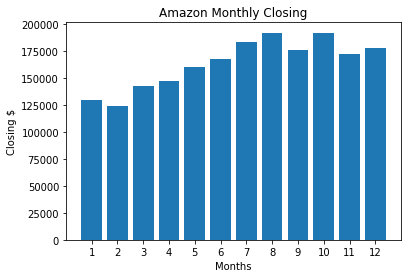

In [108]:
amazon_monthly_closing=amazon.groupby("month").sum()['Close'].reset_index()
plt.title("Amazon Monthly Closing")
plt.bar(amazon_monthly_closing['month'],amazon_monthly_closing['Close'])
plt.xticks(amazon_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Facebook Monthly Closing

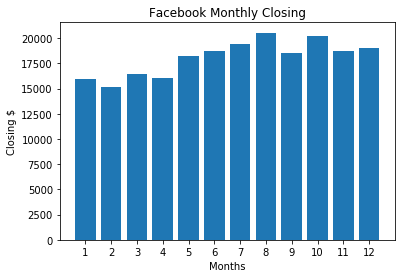

In [109]:
facebook_monthly_closing=facebook.groupby("month").sum()['Close'].reset_index()
plt.title("Facebook Monthly Closing")
plt.bar(facebook_monthly_closing['month'],facebook_monthly_closing['Close'])
plt.xticks(facebook_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Monthly Closing

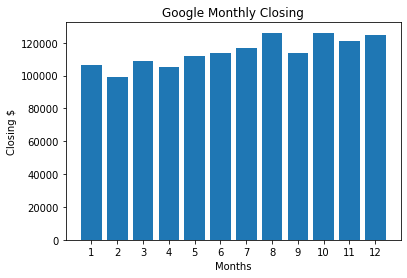

In [111]:
google_monthly_closing=google.groupby("month").sum()['Close'].reset_index()
plt.title("Google Monthly Closing")
plt.bar(google_monthly_closing['month'],google_monthly_closing['Close'])
plt.xticks(google_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Open and Closing Shares

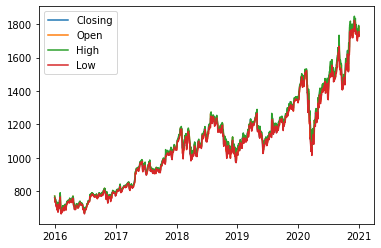

In [144]:
google.set_index("Date")
plt.plot(google['Date'],google['Close'],label ="Closing")
plt.plot(google['Date'],google['Open'],label ="Open")
plt.plot(google['Date'],google['High'],label ="High")
plt.plot(google['Date'],google['Low'],label ="Low")

plt.legend()
plt.show()

In [186]:
google['Open'].iloc[1000:1400].plot

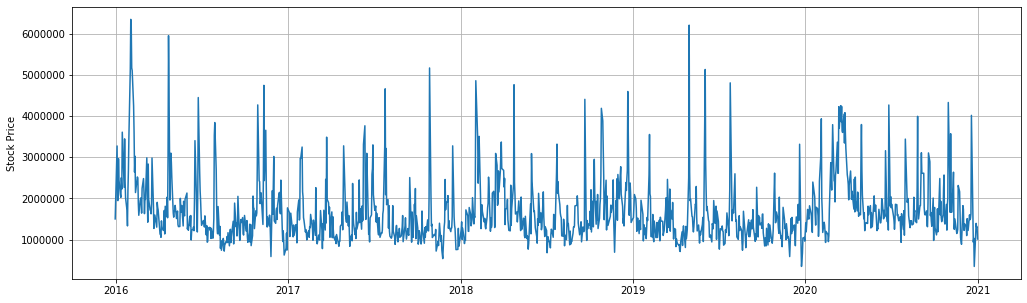

In [152]:
plt.figure(figsize=(17,5))
plt.plot(google['Date'],google['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Facebook Opening and Closing Shares

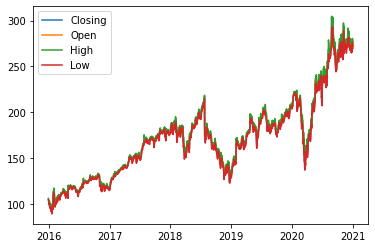

In [145]:
plt.plot(facebook['Date'],facebook['Close'],label ="Closing")
plt.plot(facebook['Date'],facebook['Open'],label ="Open")
plt.plot(facebook['Date'],facebook['High'],label ="High")
plt.plot(facebook['Date'],facebook['Low'],label ="Low")

plt.legend()
plt.show()

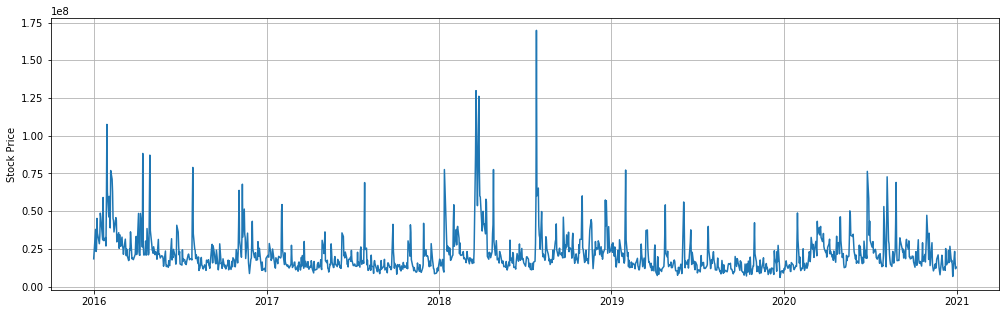

In [153]:
plt.figure(figsize=(17,5))
plt.plot(facebook['Date'],facebook['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Amazon Opening and Closing Shares

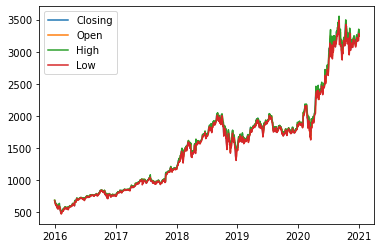

In [146]:
plt.plot(amazon['Date'],amazon['Close'],label ="Closing")
plt.plot(amazon['Date'],amazon['Open'],label ="Open")
plt.plot(amazon['Date'],amazon['High'],label ="High")
plt.plot(amazon['Date'],amazon['Low'],label ="Low")

plt.legend()
plt.show()

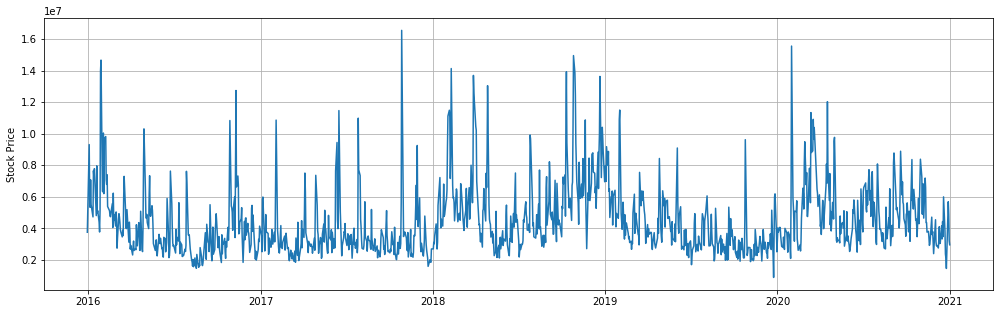

In [154]:
plt.figure(figsize=(17,5))
plt.plot(amazon['Date'],amazon['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

In [157]:
google['Total Traded']=google['Open']*google['Volume']
facebook['Total Traded']=facebook['Open']*facebook['Volume']
amazon['Total Traded']=amazon['Open']*amazon['Volume']

In [167]:
google.set_index("Date",inplace=True)
facebook.set_index("Date",inplace=True)
amazon.set_index("Date",inplace=True)

# Total Traded

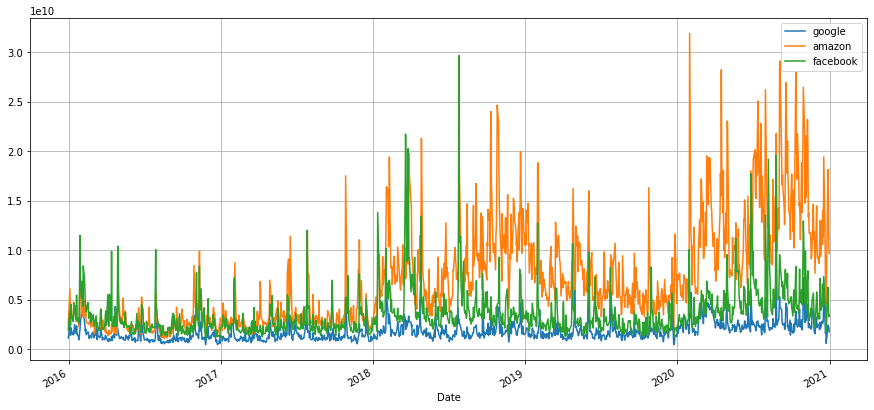

In [173]:
google['Total Traded'].plot(label='google',figsize=(15,7))
amazon['Total Traded'].plot(label='amazon',figsize=(15,7))
facebook['Total Traded'].plot(label='facebook',figsize=(15,7))
plt.legend()
plt.grid()

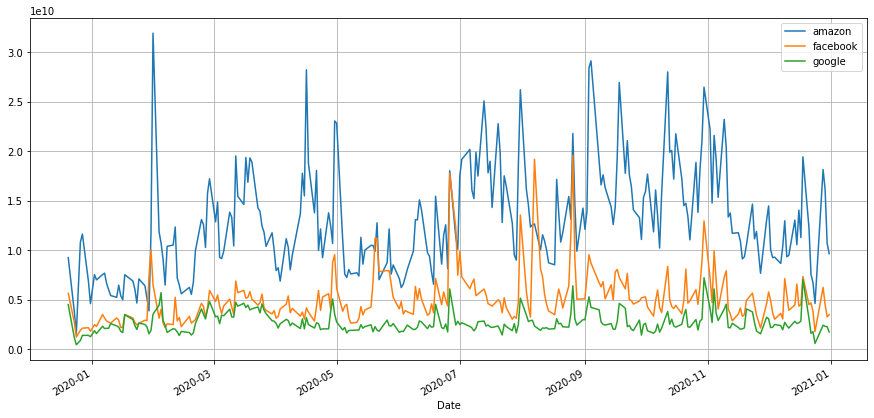

In [184]:
amazon['Total Traded'].iloc[1000:1300].plot(label="amazon",figsize=(15,7))
facebook['Total Traded'].iloc[1000:1300].plot(label="facebook")
google['Total Traded'].iloc[1000:1300].plot(label="google")
plt.legend()
plt.grid()

### Amazon is the most traded share during 2020, because in during lockdown most of people start their own buisness using Amazon FBA and Amazon PL

## Now Check The Relation by using correlation and scatter matrix 

In [190]:
open_share=pd.concat([google['Open'],amazon['Open'],facebook['Open']],axis=1)
open_share.columns=['Google Open', 'Amazon Open','Facebook Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E15F341388>,
      dtype=object)

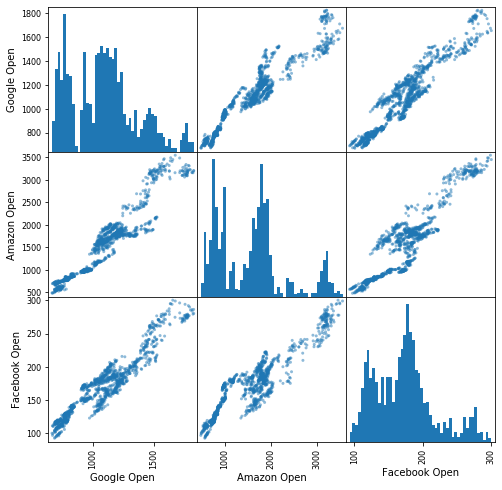

In [192]:
scatter_matrix(open_share,figsize=(8,8),hist_kwds={'bins':50})